<a href="https://colab.research.google.com/github/ArianeRav/biblioteca_pandas/blob/main/RID_190525_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar biblioteca pandas
import pandas as pd

In [ ]:
# carregar dataset do valor de vendas
base_vendas = pd.read_csv("MKT.csv", sep = ",")

In [ ]:
# carregar as primeiras linhas para análise inicial dos dados de valor das vendas
base_vendas.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# carregar as últimas linhas dos dados de valor das vendas
base_vendas.tail()

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


In [ ]:
# informações detalhadas sobre o dataframe
base_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# estatísticas descritivas das distribuição das variáveis de valor das vendas
base_vendas.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# importar e instalar biblioteca plotly para visualizações gráfica
%pip install plotly
%pip install cufflinks
%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
# importar e instalar bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# importar biblioteca plotly para visualização gráfica
fig = px.box(base_vendas, x="youtube")
fig.update_traces(line_color="red")

In [ ]:
fig = px.box(base_vendas, x="facebook")
fig.update_traces(line_color="blue")

In [ ]:
fig = px.box(base_vendas, x="newspaper")
fig.update_traces(line_color="green")

In [ ]:
# repassar nomes das colunas
base_vendas.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
# importar biblioteca seaborn
import seaborn as sns

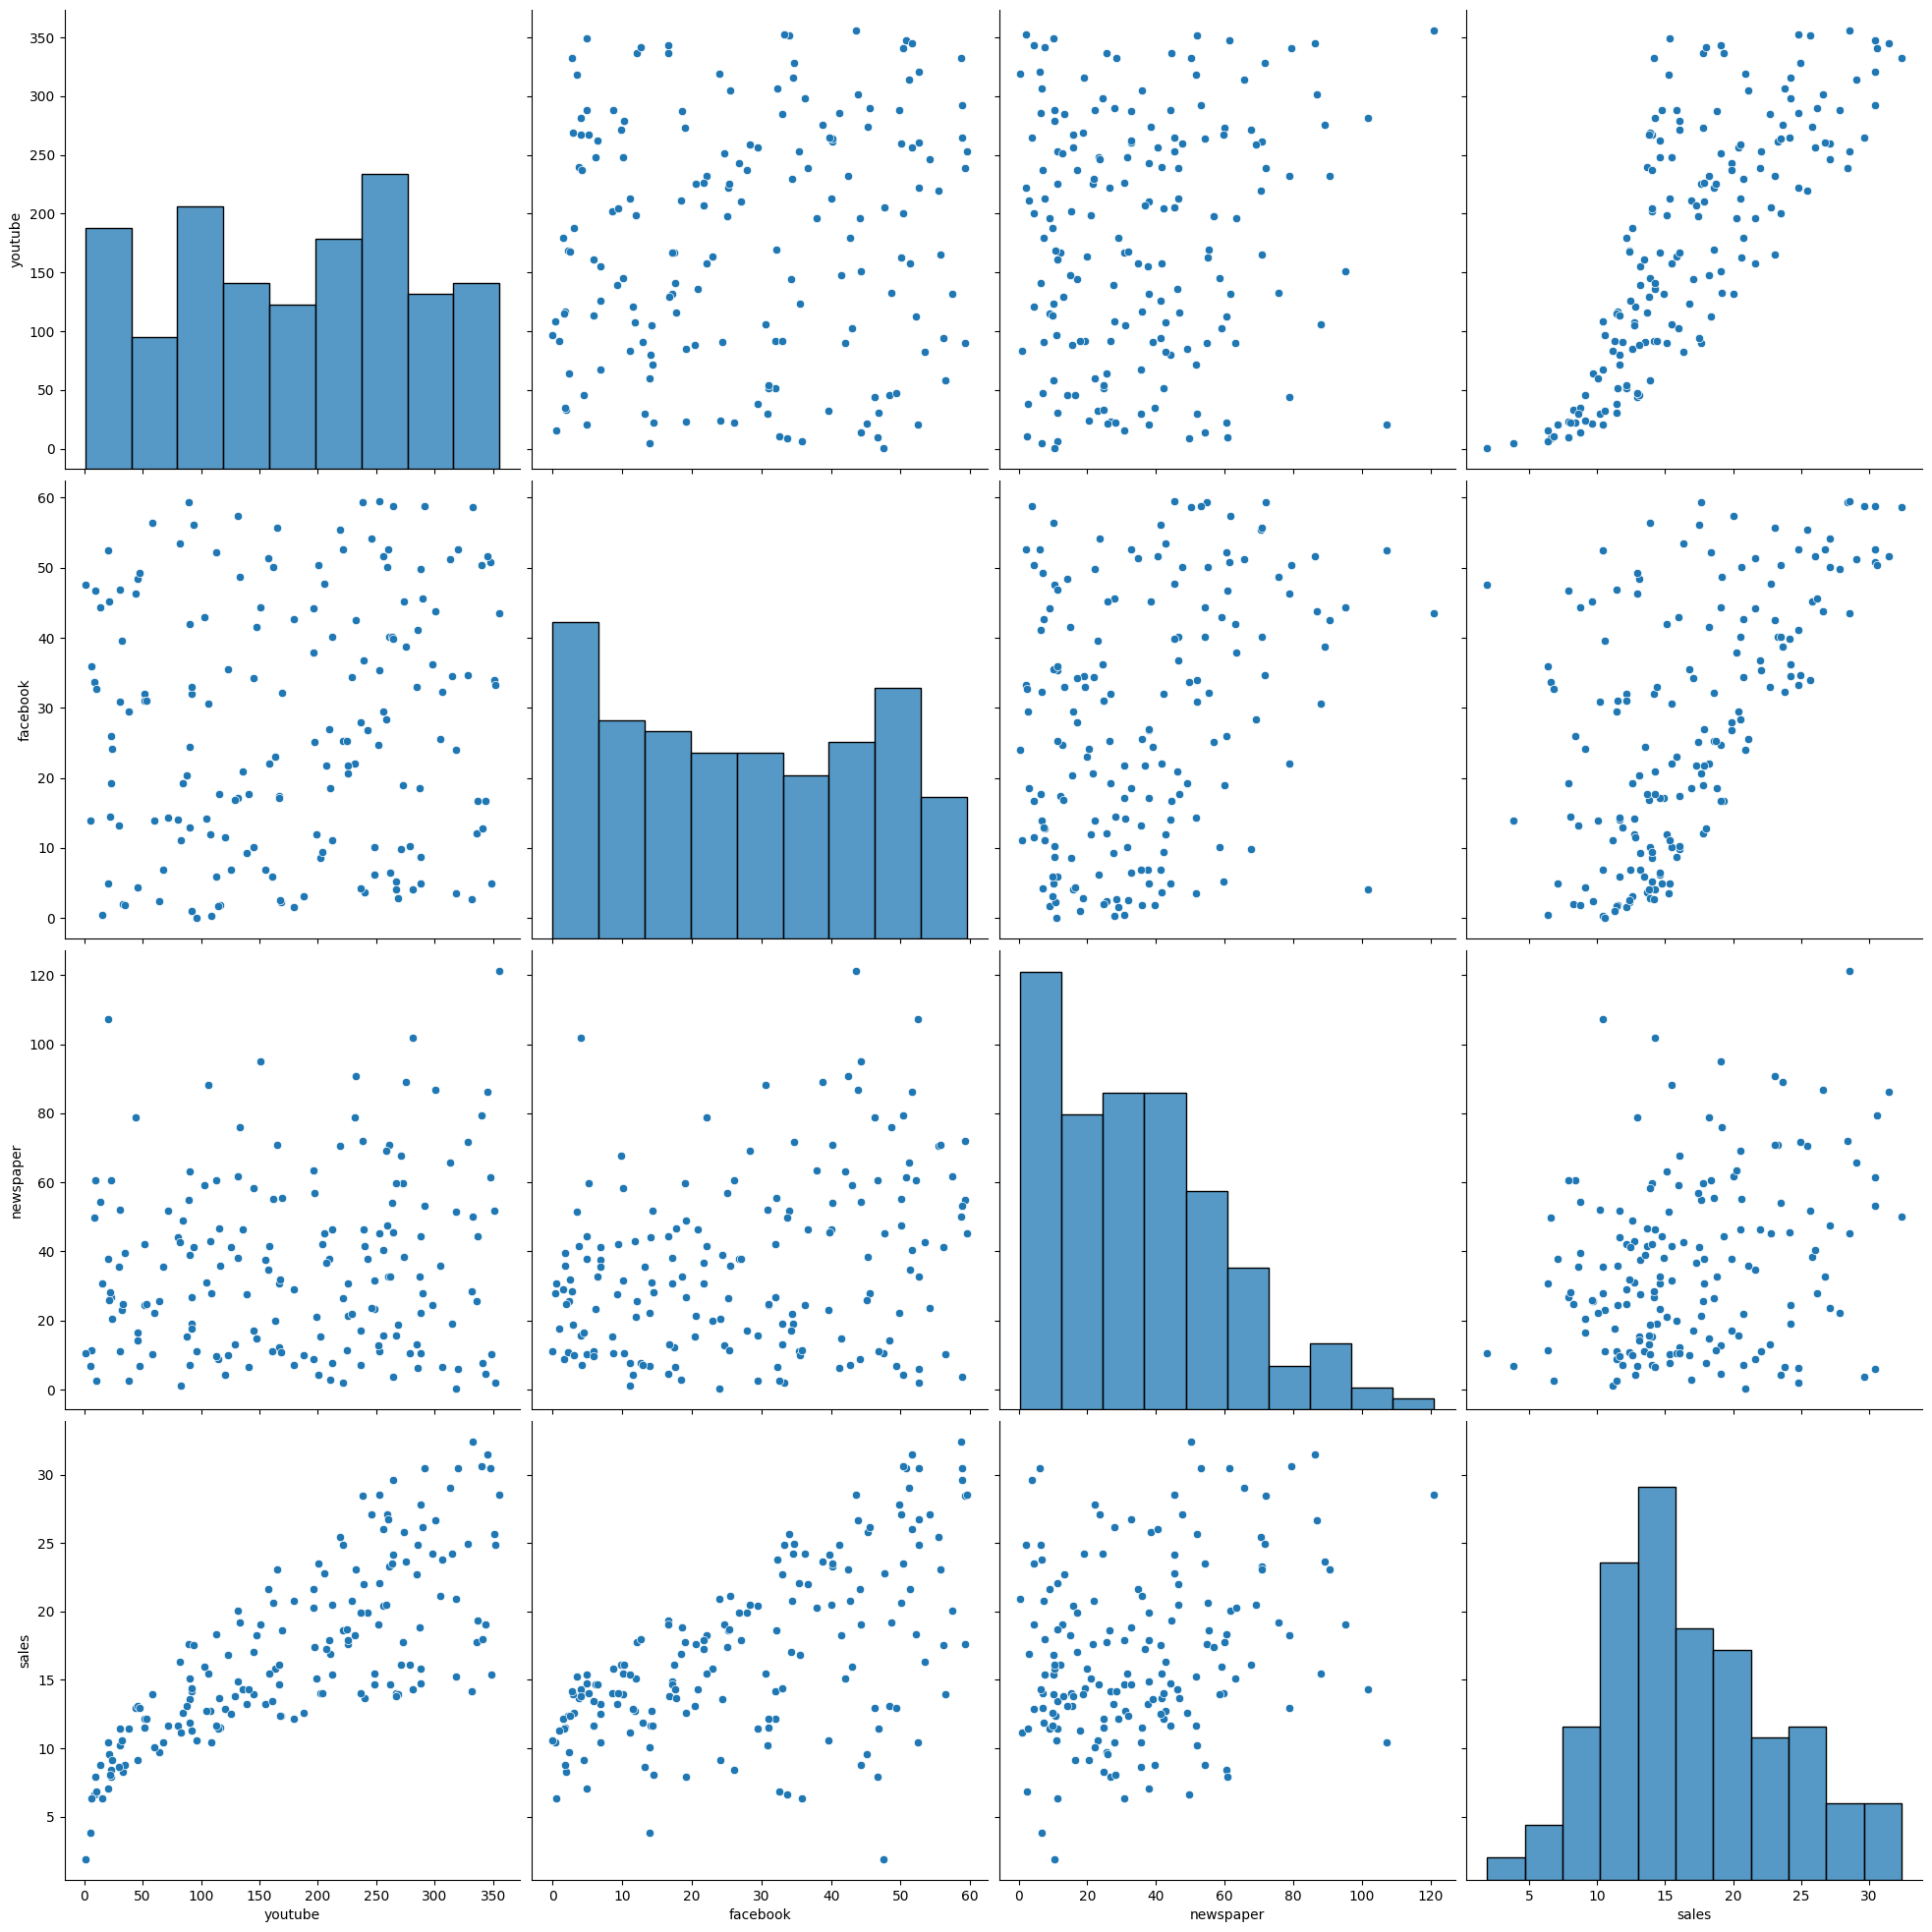

In [ ]:
# correlação entre todas as colunas do dataset
sns.pairplot(base_vendas, height=5);

In [ ]:
base_vendas.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

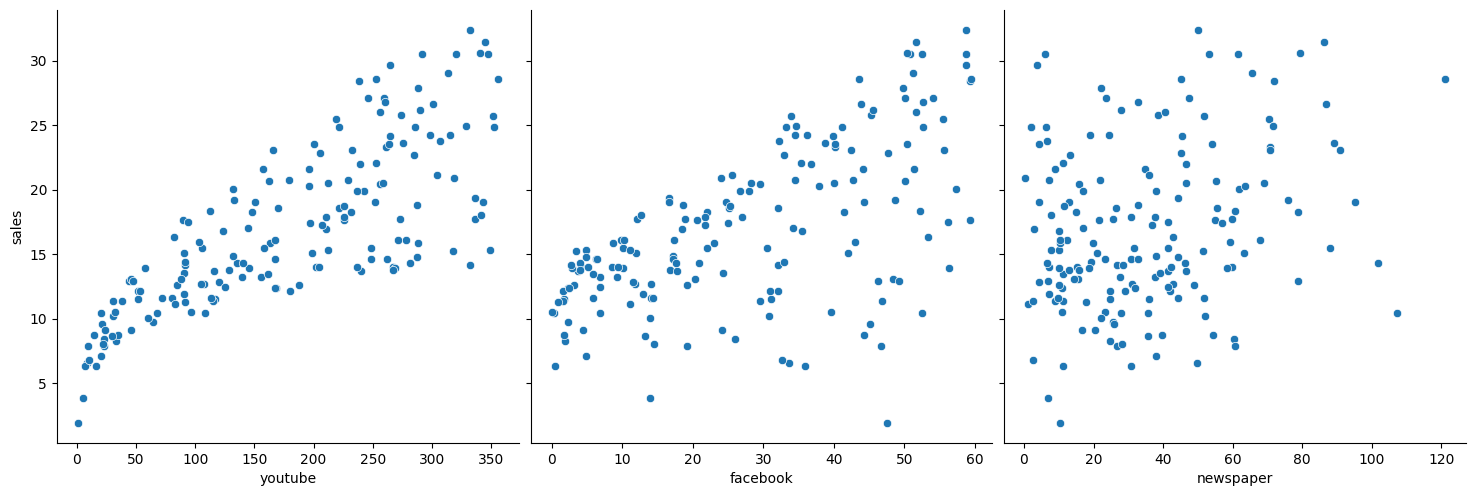

In [ ]:
# comparação de valor das vendas
sns.pairplot(base_vendas, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales', height=5);

In [ ]:
# correlação entre as variáveis
base_vendas.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


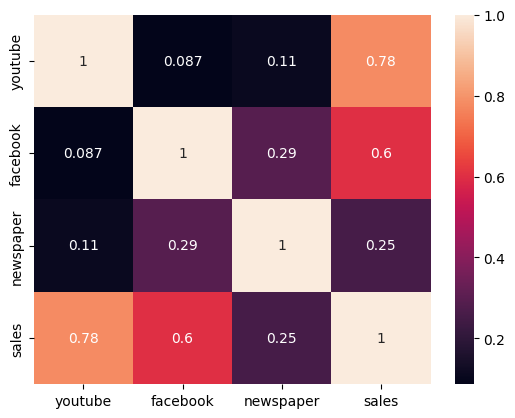

In [ ]:
# correlação entre as variáveis
sns.heatmap(base_vendas.corr(), annot=True);

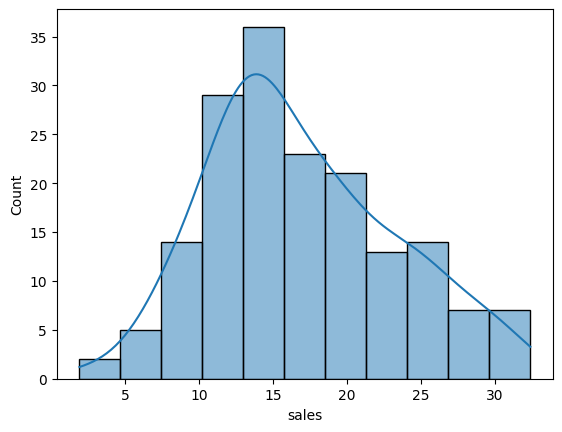

In [ ]:
# distribuição de valor das vendas
sns.histplot(base_vendas["sales"], kde=True);

In [ ]:
base_vendas.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
# separar as variáveis explicativas e variável resposta
X = base_vendas[['youtube', 'facebook', 'newspaper']]
y = base_vendas['sales']

In [ ]:
# dividir base de treino e base de teste (70% dos dados de treino e 30% de teste)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# tamanho de cada base
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119,)
(52,)


In [ ]:
# importar biblioteca de regressão linear
from sklearn.linear_model import LinearRegression

In [ ]:
# chamar a variavel para representar a regressão
lm = LinearRegression()

In [ ]:
# treinar o modelo de regressão linear
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# previsões na base de teste
y_pred = lm.predict(X_test)

In [ ]:
# importar biblioteca metricas
# comparar resultado real com a predição
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)

In [ ]:
# avaliação da performance do modelo de investimentos
print("r_quadrado:", r)

r_quadrado: 0.882423505618885


In [ ]:
# importar biblioteca do gráfico
import matplotlib.pyplot as plt

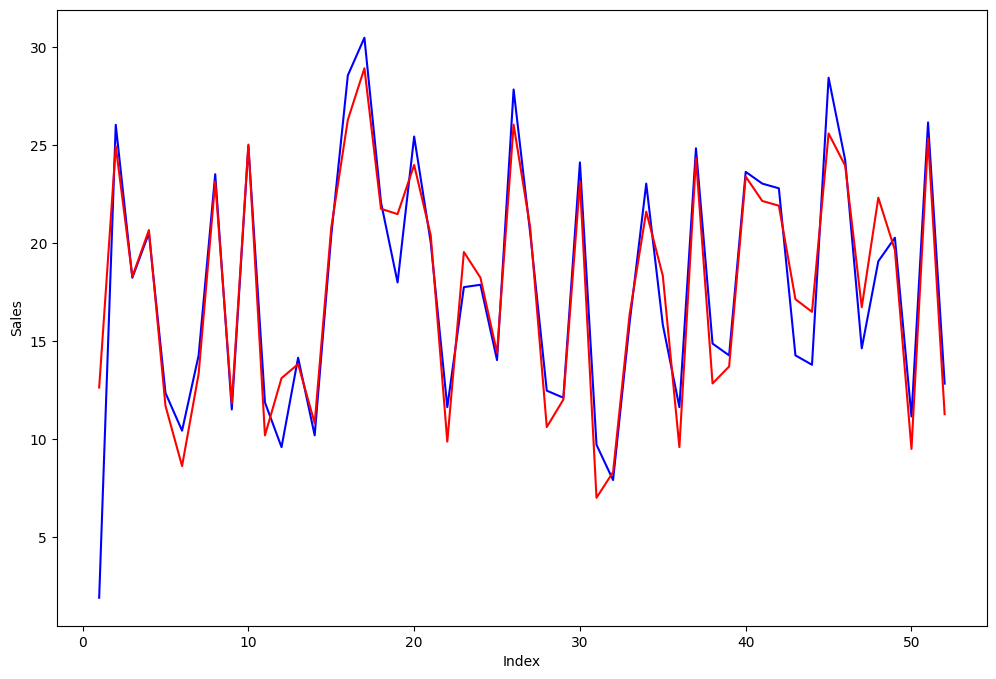

In [ ]:
# plotando os resultados de predição x real
c = [i for i in range(1, len(y_test)+1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("Index")
plt.ylabel("Sales");